In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\dhanu\\SCM.csv',encoding='latin1')

In [3]:
df1 = pd.read_csv('C:\\Users\\dhanu\\US Holidays.csv',encoding='latin1')

In [4]:
df1.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [7]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### Data Cleaning

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [38]:
#counting null values
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [12]:
#dropping unwanted/unecessary columns

df.drop(columns=['Product Description','Product Image','Customer Password', 
                'Benefit per order', 'Order Item Total', 'Order Item Product Price'],inplace=True)

Renaming Few Columns

In [14]:
df.rename(columns={'shipping date (DateOrders)':'Shipping Date'},inplace=True)
df.rename(columns={'order date (DateOrders)':'Order Date'},inplace=True)


Changing shiping date , order date to date format

In [16]:
df['Shipping Date']=pd.to_datetime(df['Shipping Date'])
df['Order Date']=pd.to_datetime(df['Order Date'])

In [17]:
df1['Date'] = pd.to_datetime(df1['Date'])

Changing few columns from int to Object type

In [20]:
c_list = ['Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 
          'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 'Order Zipcode',
          'Product Card Id', 'Product Category Id', 'Product Status']
for cln in c_list:
    df[cln]=df[cln].astype('object')

Distinct Years Present 

In [22]:
df['Order Date'].dt.year.unique()

array([2018, 2016, 2015, 2017])

Merging Supply Chain with USA Holidays list 

In [24]:
merge_df = pd.merge(df,df1[['Date','Holiday']],left_on ='Order Date',right_on = 'Date',how='left')

In [26]:
merge_df['Month']=merge_df['Order Date'].dt.month
merge_df['Year']=merge_df['Order Date'].dt.year
merge_df['Day']=merge_df['Order Date'].dt.day
merge_df['Weekday']=merge_df['Order Date'].dt.weekday
merge_df['Holiday']=merge_df['Holiday'].fillna('Non-Holiday')

### Exploratory Data Analysis

C:\Users\dhanu\AppData\Local\Temp\ipykernel_3276\11728413.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number Type',y='Count',data = data_plot,palette='coolwarm')


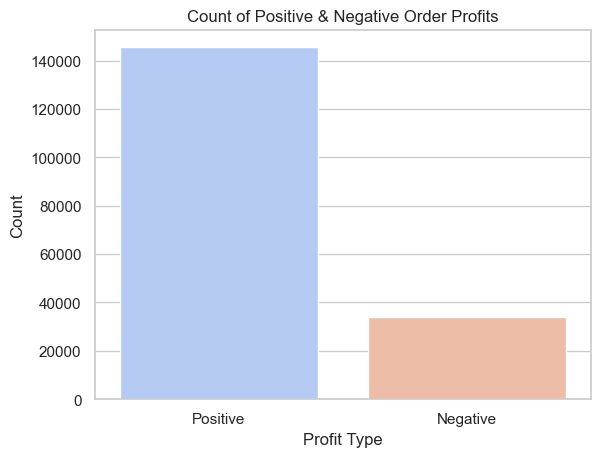

In [150]:
positive_count = (merge_df['Order Profit Per Order'] > 0).sum()
negative_count = (merge_df['Order Profit Per Order'] < 0).sum()

sns.set(style="whitegrid")
data_plot = pd.DataFrame({'Number Type':['Positive','Negative'],
                          'Count':[positive_count,negative_count]})
sns.barplot(x='Number Type',y='Count',data = data_plot,palette='coolwarm')
plt.title('Count of Positive & Negative Order Profits')
plt.xlabel('Profit Type')
plt.ylabel('Count')
plt.show()

Chart shows that the number of orders with positive profits is significantly higher than the number of orders with negative profits. This suggests that the majority of orders are generating profits for the business, while a smaller portion is resulting in losses.

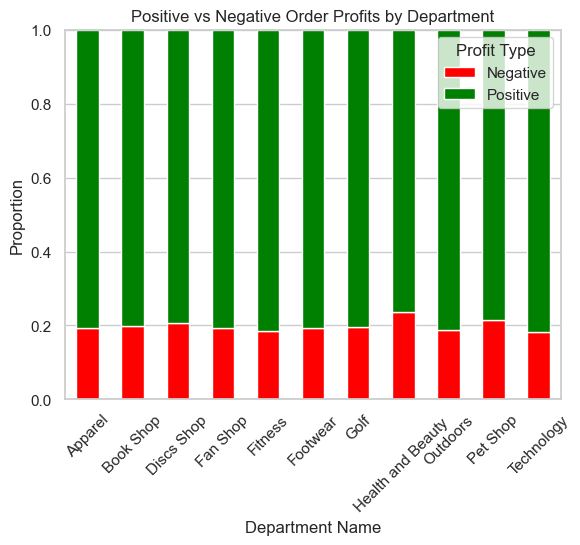

In [162]:
df = merge_df[['Department Name','Order Profit Per Order']].copy()
df['Profit Type'] = np.where(df['Order Profit Per Order']>0,'Positive','Negative')

profit_counts = df.groupby(['Department Name','Profit Type']).size().unstack(fill_value=0)
profit_prop = profit_counts.div(profit_counts.sum(axis=1),axis=0)


profit_prop.plot(kind='bar',stacked=True,color=['red','green'])
plt.ylabel('Proportion')
plt.title('Positive vs Negative Order Profits by Department')
plt.legend(title='Profit Type')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

All departments have a higher proportion of positive order profits (green) compared to negative order profits (red), with the split being roughly 80% positive to 20% negative across departments.

The Health and Beauty Outdoors department appears to have the highest proportion of negative order profits, while departments like Apparel and Book Shop have slightly lower proportions of negative profits.

The relatively consistent ratio across all departments suggests this might be a systemic pattern rather than being specific to any particular product category or department.

In [31]:
merge_df['Order Profit Per Order'].describe()

count    180519.000000
mean         21.974989
std         104.433526
min       -4274.979980
25%           7.000000
50%          31.520000
75%          64.800003
max         911.799988
Name: Order Profit Per Order, dtype: float64

This summary provides key statistical insights into the "Order Profit Per Order" column. There are 180,519 data points, with an average profit of approximately $21.97. The standard deviation is high (104.43), indicating significant variability in the profit per order. The minimum value is a large loss of -$4,274.98, while the maximum profit is $911.80. The median (50th percentile) is $31.52, showing that half of the orders have a profit of less than this amount. The interquartile range (IQR), with the 25th percentile at $7 and the 75th percentile at $64.80, indicates the spread of middle 50% of the profits.

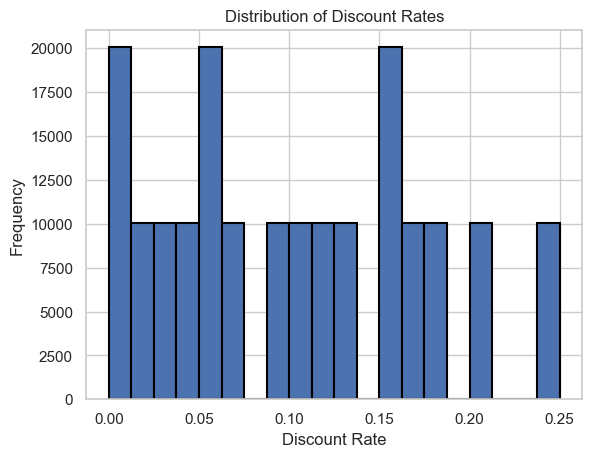

In [177]:
plt.hist(merge_df['Order Item Discount Rate'],bins = 20, linewidth=1.5,edgecolor='black')
plt.title('Distribution of Discount Rates')
plt.xlabel('Discount Rate')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most items in the dataset receive discount rates of 0%, 5%, and 15%, indicating these are the most commonly used discount levels. Higher discount rates like 20% and 25% are applied less frequently.

In [56]:
merge_df['Order Item Discount Rate']=merge_df['Order Item Discount Rate'].round(2)

                          Total Profit Per Order
Order Item Discount Rate                        
0.00                                   58.126460
0.01                                   52.379576
0.02                                   57.645991
0.03                                   50.346061
0.04                                   51.536337
0.05                                   53.901129
0.06                                   55.404688
0.07                                   52.631150
0.09                                   48.399373
0.10                                   51.297825
0.12                                   46.794156
0.13                                   45.903140
0.15                                   41.949066
0.16                                   47.052025
0.17                                   43.216069
0.18                                   45.642962
0.20                                   37.264265
0.25                                   44.983407


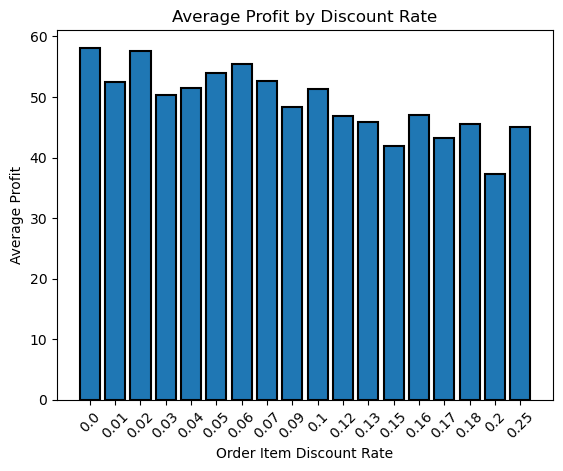

In [58]:
merge_df['Total Profit Per Order'] = merge_df['Order Profit Per Order']*merge_df['Order Item Quantity']

avg_sales_by_discount = merge_df.groupby('Order Item Discount Rate').agg({"Total Profit Per Order":'mean'}).sort_index()

avg_sales_by_discount = avg_sales_by_discount.sort_values('Order Item Discount Rate')

print(avg_sales_by_discount)

plt.bar(avg_sales_by_discount.index.astype(str),avg_sales_by_discount['Total Profit Per Order'].round(1),linewidth=1.5,edgecolor='black')

plt.xlabel('Order Item Discount Rate')
plt.ylabel('Average Profit')
plt.title('Average Profit by Discount Rate')
plt.xticks(rotation=45)
plt.show()

Higher discounts (above 15%) lead to reduced average profit, which indicates that larger discounts may negatively impact profitability. Careful consideration is needed when offering high discounts.

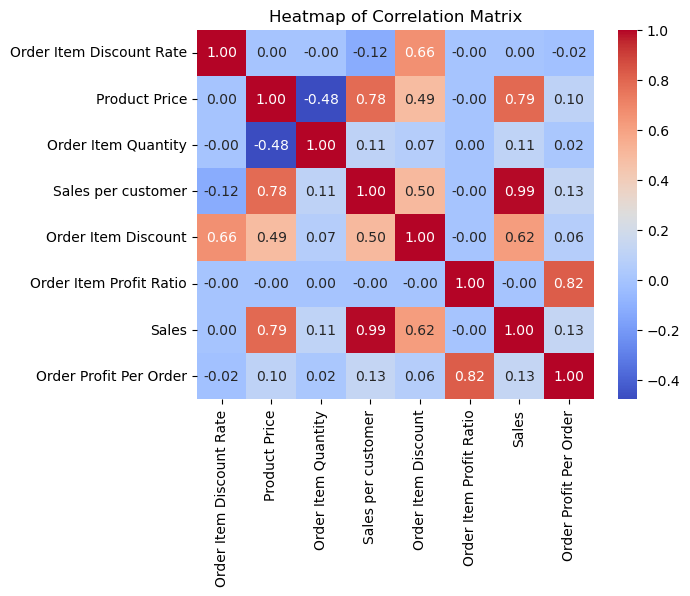

In [60]:
matrix_df = merge_df[['Order Item Discount Rate', 'Product Price','Order Item Quantity', 'Sales per customer', 
                     'Order Item Discount', 'Order Item Profit Ratio', 'Sales', 'Order Profit Per Order']]
corr_matrix = matrix_df.corr()
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',cbar = True)
plt.title('Heatmap of Correlation Matrix') 
plt.show()

Discount rates have a negative correlation with profit, meaning higher discounts tend to reduce profitability. On the other hand, higher product prices and larger quantities positively affect sales and profit.

**"Total Profit Per Order Prediction Using OLS Regression: Model Summary and Analysis"**

In [256]:
import statsmodels.api as sm

X = merge_df[['Order Item Discount Rate', 'Product Price', 'Order Item Quantity']]
y = merge_df['Total Profit Per Order'] 

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Total Profit Per Order   R-squared:                       0.026
Model:                                OLS   Adj. R-squared:                  0.026
Method:                     Least Squares   F-statistic:                     1597.
Date:                    Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                            16:44:49   Log-Likelihood:            -1.2704e+06
No. Observations:                  180519   AIC:                         2.541e+06
Df Residuals:                      180515   BIC:                         2.541e+06
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**Findings**

**R- squared**: 26% of the variation in 'Total Profit Per Order' is explained by the independent variables ('Order Item Discount Rate', 'Product Price', and 'Order Item Quantity'

**Order Item Discount Rate**: The model’s estimated coefficient is -65.2753, which means that for every unit increase in the discount rate (assuming the unit is 1, or 100%), the average Total Profit Per Order will decrease by 65.2753 units. This coefficient is statistically significant (p-value close to 0), indicating that an increase in the discount rate is significantly negatively correlated with the total profit of the order.

**Product Price**: The coefficient is 0.1393, meaning that for every unit increase in the product price, the average Total Profit Per Order will increase by 0.1393 units. This coefficient is also statistically significant, indicating that an increase in product price is positively correlated with the total profit of the order.

**Order Item Quantity**: The coefficient is 34.7414, meaning that for every additional order item, the average Total Profit Per Order will increase by 34.7414 units. This is also statistically significant, indicating that an increase in the quantity sold is positively correlated with the total profit of the order.

In [62]:
merge_df['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [64]:
order_counts = merge_df.groupby('Market').size().reset_index(name='Order_Count').sort_values(by='Order_Count',ascending=False)
order_counts


,Market,Order_Count
2,LATAM,51594
1,Europe,50252
3,Pacific Asia,41260
4,USCA,25799
0,Africa,11614


Latin America have biggest market ie number of orders are more

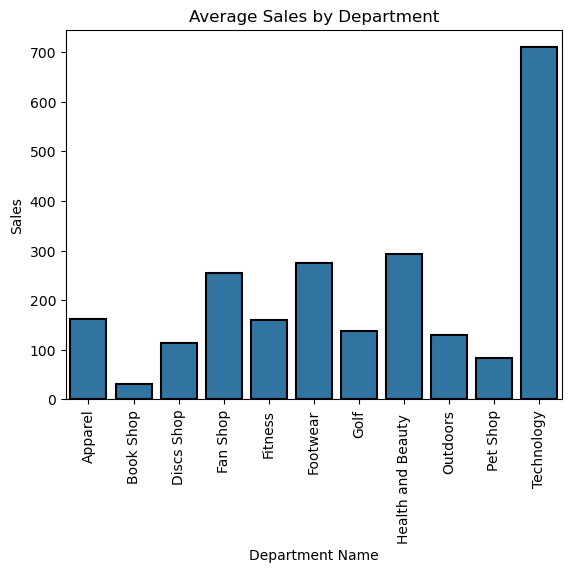

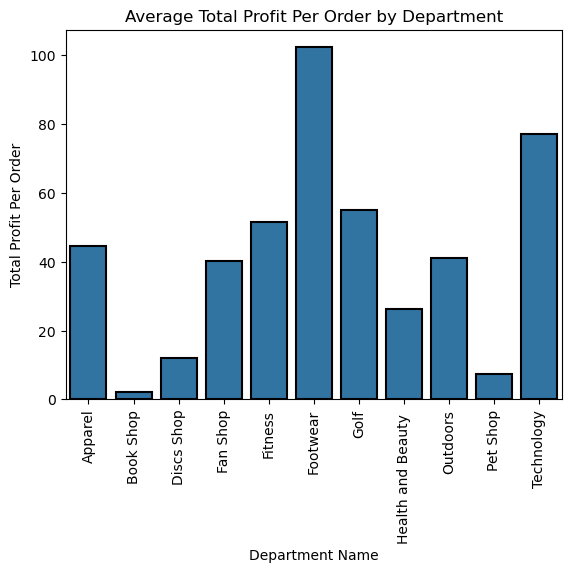

In [66]:
avg_sales_profit = merge_df.groupby('Department Name').agg({'Sales':'mean','Total Profit Per Order':'mean'}).reset_index()
sns.barplot(x='Department Name',y='Sales', data = avg_sales_profit,linewidth=1.5,edgecolor='black')
plt.title('Average Sales by Department')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Department Name',y='Total Profit Per Order', data = avg_sales_profit,linewidth=1.5,edgecolor='black')
plt.title('Average Total Profit Per Order by Department')
plt.xticks(rotation=90)
plt.show()

Technology Department recorded high number of average sales , whereas Footwear recorded high average Total profit 

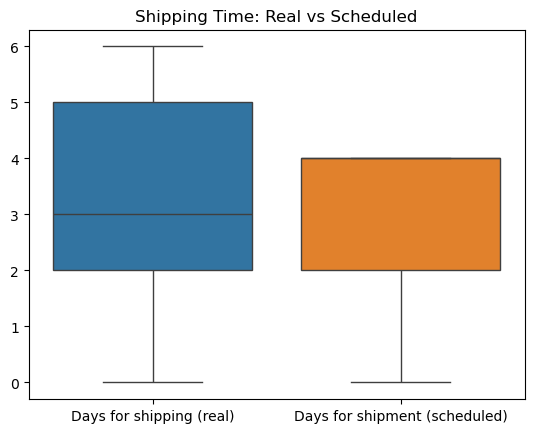

In [68]:
sns.boxplot(data=merge_df[['Days for shipping (real)','Days for shipment (scheduled)']])
plt.title('Shipping Time: Real vs Scheduled')
plt.show()                           

**Days for Shipping (Real) (blue box)**:

**Median**: The median real shipping time is around 3 days (represented by the line inside the box).

**Interquartile Range (IQR)**: The box spans from around 2 to 5 days, indicating that 50% of the shipments took between 2 and 5 days.

**Whiskers**: The whiskers extend from 0 to 6 days, meaning the range of real shipping times varies from 0 to 6 days.

**Days for Shipment (Scheduled) (orange box)**:

**Median**: The median scheduled shipping time is around 2 days.

**IQR**: The box spans from around 2 to 4 days, suggesting that the majority of scheduled shipments are expected to take between 2 and 4 days.

**Whiskers**: The whiskers range from 0 to 4 days, indicating that scheduled shipments have a more condensed range compared to real shipping times.


**Findings**:

Real shipping takes longer on average than scheduled shipping.

There is greater variability in real shipping times, indicating potential delays in meeting schedules.

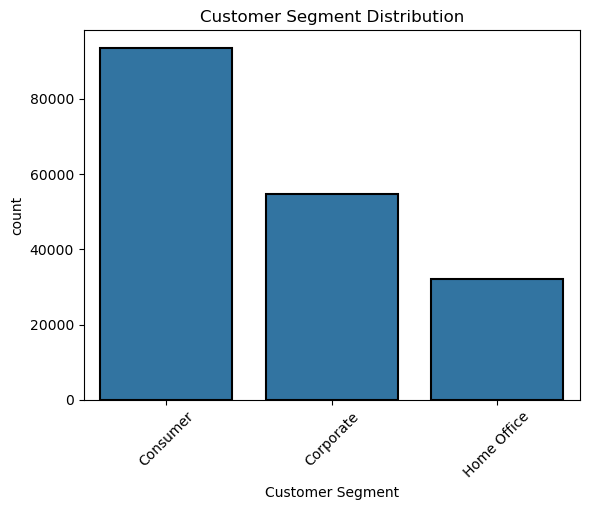

In [70]:
sorted_segment = merge_df['Customer Segment'].value_counts().index
sns.countplot(x='Customer Segment',data = merge_df,linewidth=1.5,edgecolor='black',order = sorted_segment)
plt.title('Customer Segment Distribution')
plt.xticks(rotation=45)
plt.show()

The Customer Segment Distribution shows that the "Consumer" segment has the highest number of customers, followed by "Corporate" and then "Home Office". This suggests that the majority of the customer base is individuals, while businesses and home offices make up smaller portions.

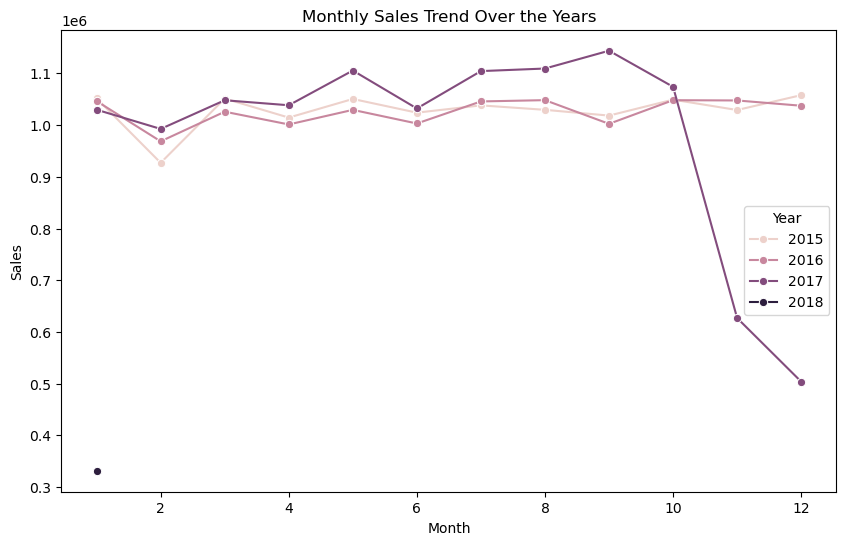

In [72]:
monthly_sales = merge_df.groupby(['Year', 'Month']).agg({'Sales': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title("Monthly Sales Trend Over the Years")
plt.show()

The line plot shows the monthly sales trend from 2015 to 2018. Sales remained relatively stable across the first 9 months for all years, peaking around August. However, in 2018, there was a significant drop in sales in the last quarter (October to December), suggesting a potential issue or change in market dynamics during that period

           Category Name  Order Item Quantity
12                Cleats                73734
47       Women's Apparel                62956
30  Indoor/Outdoor Games                57803
10      Cardio Equipment                37587
38         Shop By Sport                32726
34        Men's Footwear                22246
18               Fishing                17325
46          Water Sports                15540
9       Camping & Hiking                13729
17           Electronics                 9436


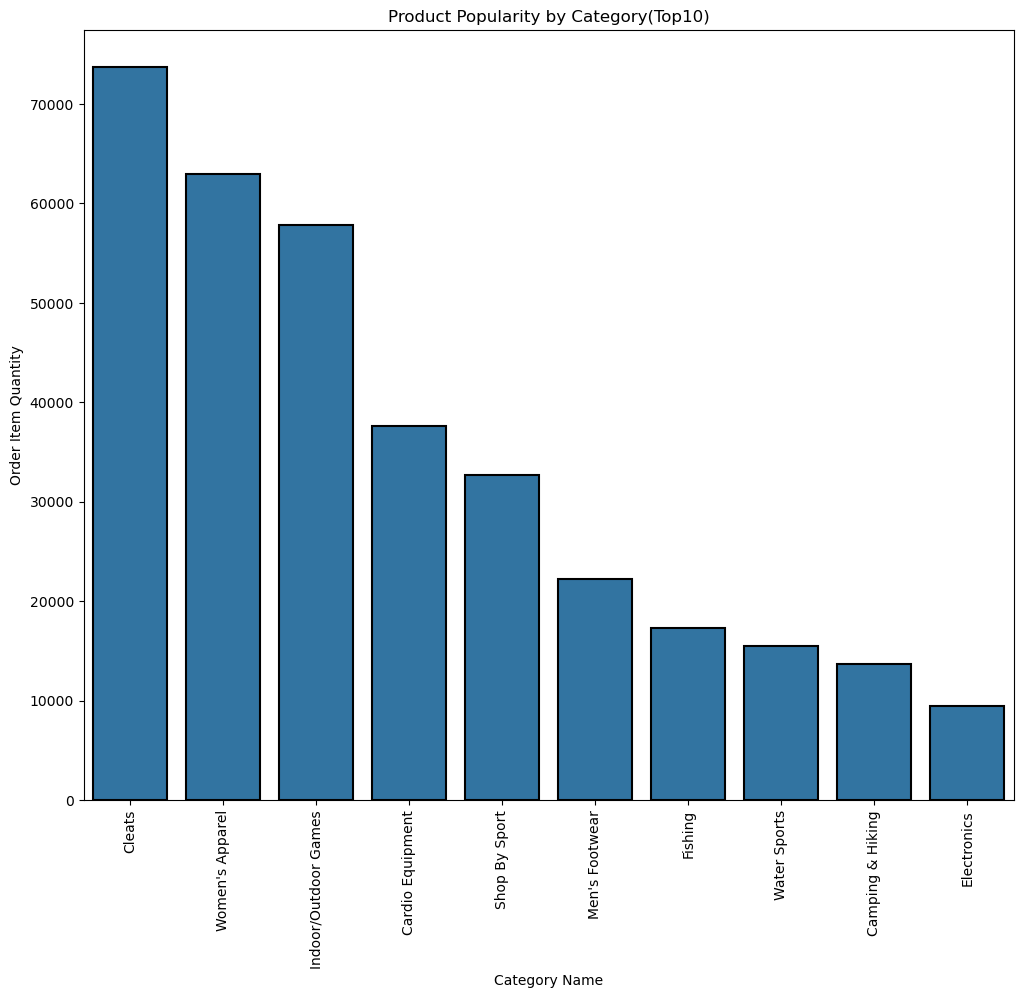

In [44]:
product_pop = merge_df.groupby('Category Name').agg({'Order Item Quantity':'sum'}).reset_index().sort_values(by='Order Item Quantity', ascending=False).head(10)
print(product_pop)
plt.figure(figsize=(12,10))
sns.barplot(x='Category Name' , y = 'Order Item Quantity',data = product_pop,linewidth=1.5,edgecolor='black')
plt.title('Product Popularity by Category(Top10)')
plt.xticks(rotation=90)
plt.show()

The Product Popularity by Category chart reveals that "Cleats" is the top-selling category, followed by "Women's Apparel" and "Indoor/Outdoor Games". This suggests that sports equipment, particularly footwear, is driving sales, while other categories, such as "Electronics" and "Camping & Hiking", have lower demand

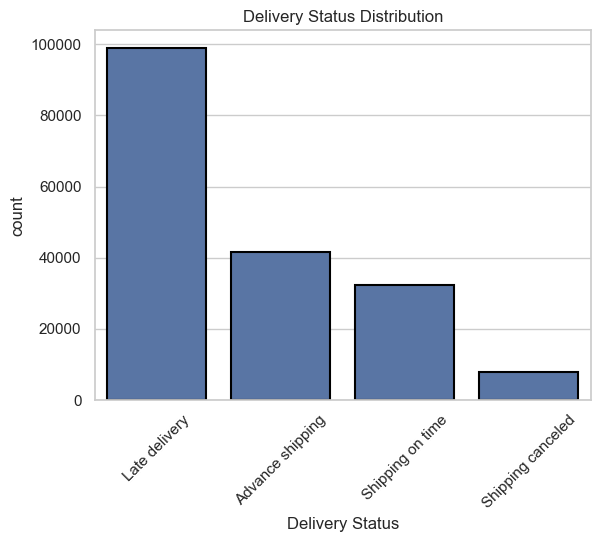

In [476]:
sorted_delivery_status = merge_df['Delivery Status'].value_counts().index
sns.countplot(x='Delivery Status',data = merge_df,order=sorted_delivery_status,linewidth=1.5,edgecolor='black')
plt.title('Delivery Status Distribution')
plt.xticks(rotation=45)

plt.show()

"Late delivery" category has the highest number of occurrences, followed by "Advance shipping" and then "Shipping on time". "Shipping canceled" has the lowest number of occurrences. This suggests that late deliveries are a significant issue, while advance shipping and shipping on time are more common.

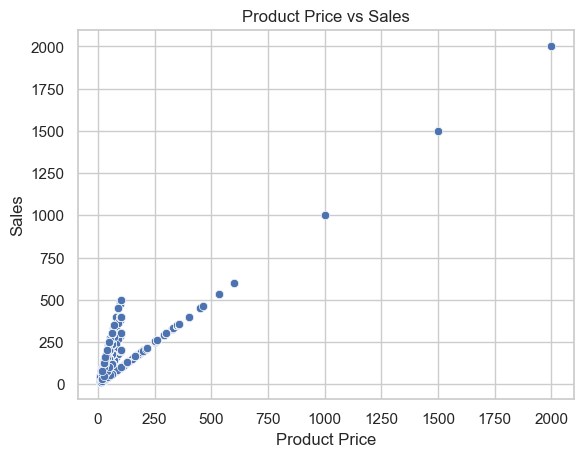

In [487]:
sns.scatterplot(x='Product Price',y='Sales',data = merge_df)
plt.title('Product Price vs Sales')
plt.show()

Plot shows a general trend of increasing sales with higher product prices. However, there are also some outliers with high prices and low sales, suggesting that price alone may not be the sole determinant of sales performance.

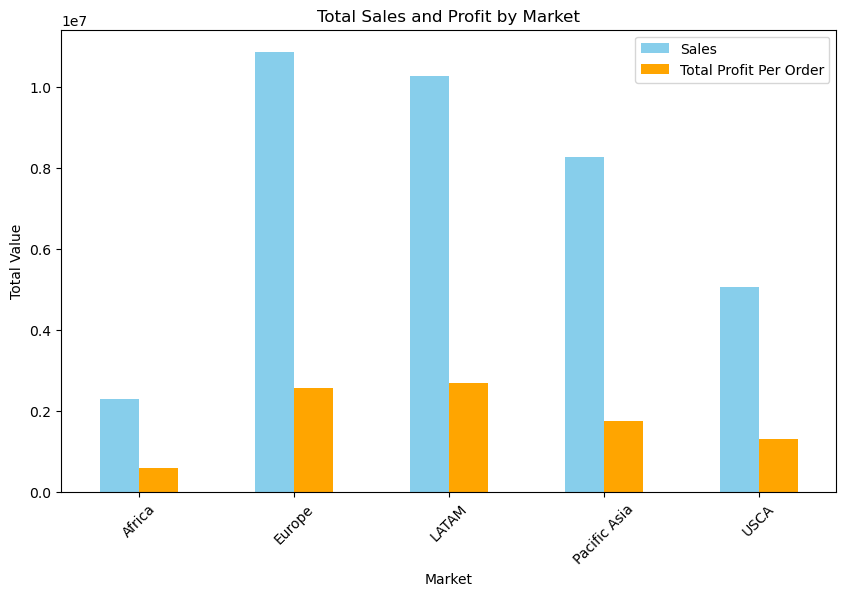

In [76]:
sales_profit_by_market = merge_df.groupby('Market').agg({'Sales':'sum','Total Profit Per Order':'sum'}).reset_index()
plt.figure(figsize=(10,6))  
sales_profit_by_market.plot(kind='bar', x='Market', color=['skyblue', 'orange'], ax=plt.gca())  
plt.title("Total Sales and Profit by Market")
plt.xlabel('Market')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()


Europe and LATAM have the highest sales values, followed by Pacific Asia.

Africa and USCA have the lowest total sales and profits, indicating smaller market size or demand.

Total Profit Per Order is consistently lower than total sales in all regions, with Europe and LATAM showing the largest profit per order gaps.

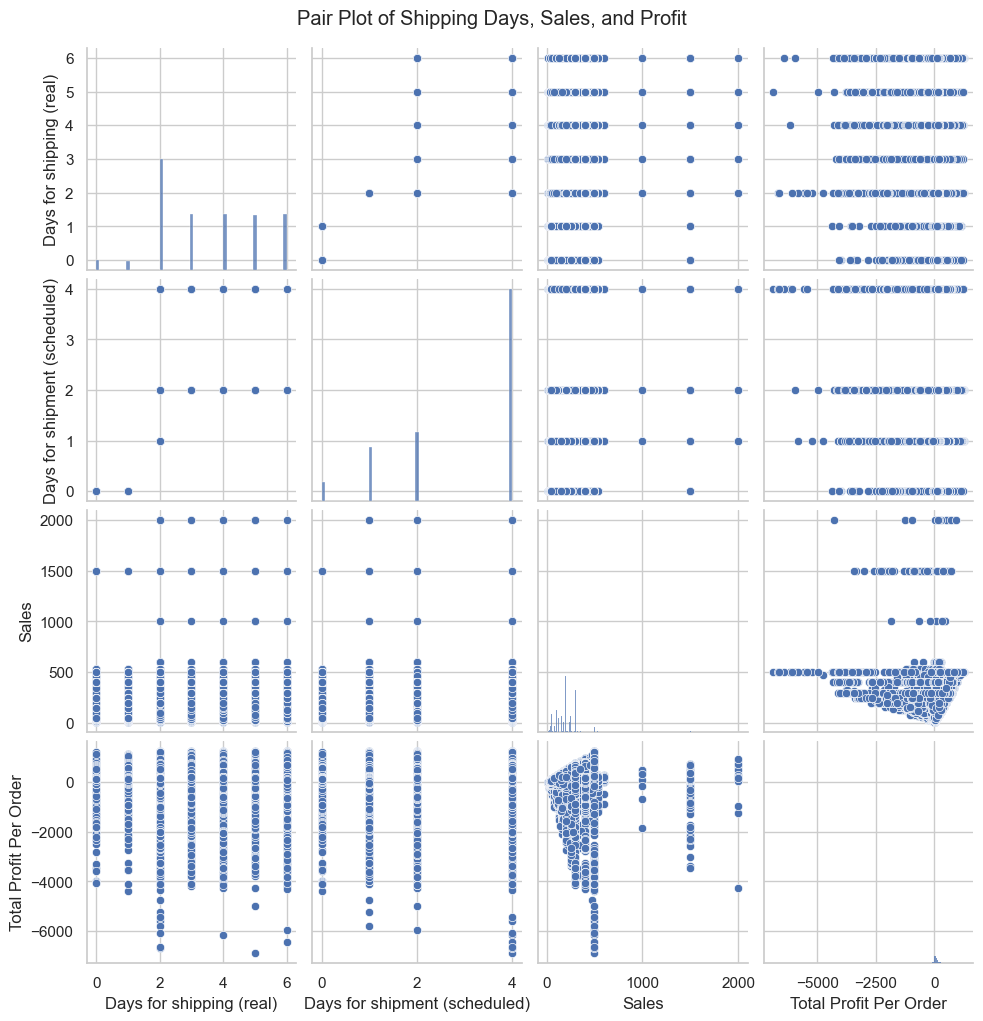

In [525]:
sns.pairplot(merge_df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales', 'Total Profit Per Order']])
plt.suptitle("Pair Plot of Shipping Days, Sales, and Profit", y=1.02)
plt.show()




There is no clear correlation between "Days for shipping (real)" and "Sales" or "Profit."

A noticeable cluster shows most data points have low shipping days and low sales.
    
High negative profit seems to be associated with low sales.

   Order Item Discount Rate  Total Profit Per Order
0                      0.00             -244.740005
1                      0.01              120.360001
2                      0.04              359.949989
3                      0.06              408.200012
4                      0.07                0.000000
5                      0.12              110.000000
6                      0.13               11.730000
7                      0.15                1.100000
8                      0.17               53.450002
9                      0.20               88.790001


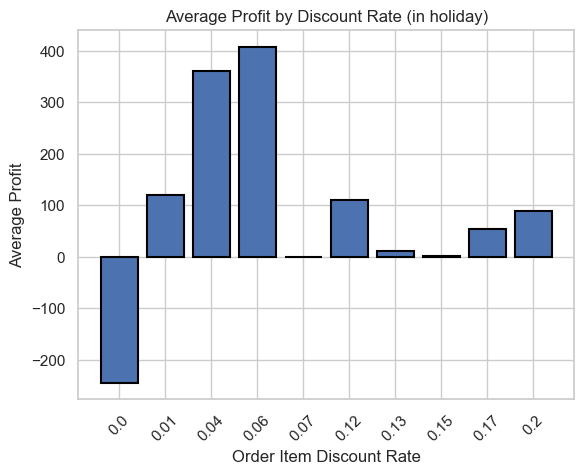

In [570]:
filtered_df = merge_df[merge_df['Holiday']!= 'Non-Holiday']
avg_sales_by_discount_nhol = filtered_df.groupby('Order Item Discount Rate')['Total Profit Per Order'].mean().reset_index()
average_sales_by_discount_nhol = avg_sales_by_discount_nhol.sort_values('Order Item Discount Rate')

print(average_sales_by_discount_nhol)

plt.bar(average_sales_by_discount_nhol['Order Item Discount Rate'].astype(str),avg_sales_by_discount_nhol['Total Profit Per Order'].round(1),linewidth=1.5,edgecolor='black')

plt.xlabel('Order Item Discount Rate')
plt.ylabel('Average Profit')
plt.title('Average Profit by Discount Rate (in holiday)')
plt.xticks(rotation=45)
plt.show()



Discounts between 4-6% lead to the highest average profits during holidays.

Extremely low discount rates (0% or near 0%) result in negative profit, indicating discounts are necessary for profitability.

Discounts above 15% yield diminishing returns, with profits decreasing.

**"Order Item Profit Ratio Prediction Using OLS Regression: Model Summary and Analysis"**

In [579]:

import statsmodels.api as sm

X = filtered_df[['Order Item Discount Rate', 'Product Price', 'Order Item Quantity']]
y=filtered_df['Order Item Profit Ratio']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Order Item Profit Ratio   R-squared:                       0.456
Model:                                 OLS   Adj. R-squared:                  0.223
Method:                      Least Squares   F-statistic:                     1.959
Date:                     Thu, 10 Oct 2024   Prob (F-statistic):              0.209
Time:                             20:50:48   Log-Likelihood:                 2.0382
No. Observations:                       11   AIC:                             3.924
Df Residuals:                            7   BIC:                             5.515
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

C:\Users\dhanu\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


**Findings**

**R-squared** : 45.6% of the variation in 'Order Item Profit Ratio' is explained by the independent variables ('Order Item Discount Rate', 'Product Price', and 'Order Item Quantity'

**Order Item Discount Rate (1.7493)**: This coefficient shows the positive effect of 'Order Item Discount Rate' on 'Order Item Profit Ratio'. For every one unit increase in discount rate, the profit ratio increases by 1.7493 units. This is statistically significant, as the p-value (0.123) is just on the edge of the usual threshold of 0.05.

**Product Price (0.8017)**: The positive coefficient indicates that as the product price increases, the profit ratio increases slightly (by 0.8017). The p-value (0.004) suggests that this is statistically significant.

**Order Item Quantity (0.8999)**: A positive relationship between the quantity of items ordered and the profit ratio. For every unit increase in quantity, profit ratio increases by approximately 0.8999 units, but this is not highly statistically significant with a p-value of 0.259.

**"Sales Prediction Using OLS Regression: Model Summary and Analysis"**

In [604]:

import statsmodels.api as sm

X = filtered_df[['Order Item Discount Rate', 'Product Price', 'Order Item Quantity', 'Total Profit Per Order']]
y=filtered_df['Sales']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     8.027
Date:                Thu, 10 Oct 2024   Prob (F-statistic):             0.0138
Time:                        21:19:54   Log-Likelihood:                -59.329
No. Observations:                  11   AIC:                             128.7
Df Residuals:                       6   BIC:                             130.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

C:\Users\dhanu\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


**Findings**

**R-squared (0.843)**: This value indicates that 84.3% of the variance in Sales is explained by the independent variables (Order Item Discount Rate, Product Price, Order Item Quantity, and Total Profit Per Order). This is a relatively high value, suggesting a good fit.

**Order Item Discount Rate (coef = 41.8586, p-value = 0.0003)**: This coefficient is positive and statistically significant (p-value < 0.05). This suggests that for each unit increase in the discount rate, sales increase by approximately 41.86 units, indicating a strong positive impact of discounts on sales.

**Product Price (coef = 1.4637, p-value = 0.383)**: The product price has a positive but statistically insignificant impact on sales (p-value > 0.05). This suggests that while there is a slight positive relationship, it’s not strong enough to conclude that Product Price affects sales significantly in this model.

**Order Item Quantity (coef = 92.2395, p-value = 0.011)**: The quantity of items ordered has a strong positive and statistically significant effect on Sales. For each additional item ordered, sales increase by around 92.24 units

**Total Profit Per Order (coef = 0.0503, p-value = 0.469)**: This variable has a very small and statistically insignificant effect on sales, meaning that Total Profit Per Order doesn't significantly impact Sales in this model.

**"Predicting Sales with Random Forest Regression: Feature Importance Analysis"**

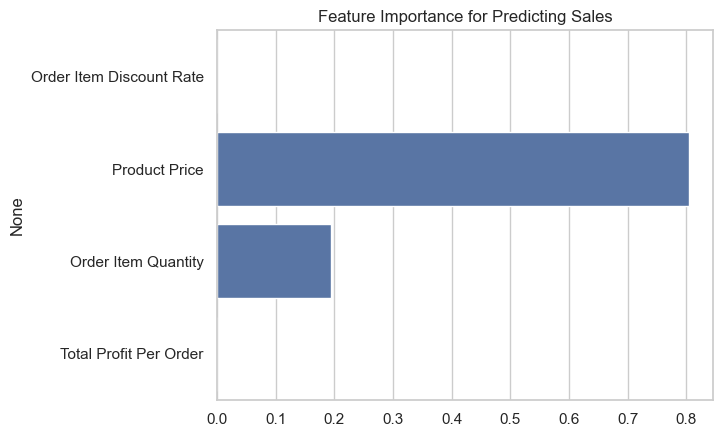

In [615]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


X = merge_df[['Order Item Discount Rate', 'Product Price', 'Order Item Quantity', 'Total Profit Per Order']]
y = merge_df['Sales']


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


importances = rf.feature_importances_
features = X.columns


sns.barplot(x=importances, y=features)
plt.title('Feature Importance for Predicting Sales')
plt.show()


**Findings**:

**Product Price**:
This feature is the most important factor for predicting sales. Its importance score is significantly higher (close to 0.8), indicating that the price of a product has a major impact on sales.

**Order Item Quantity**:
The second most important feature is the quantity of items ordered. With a moderate importance score (around 0.2), it suggests that the number of items ordered also contributes to predicting sales, but less so than product price.

**Order Item Discount Rate**:
This feature has a relatively low importance, suggesting that the discount rate does not strongly influence sales predictions in your dataset. It's still considered, but its impact is minimal.

**Total Profit Per Order**:
This feature has an almost negligible importance score. In the context of this model, the total profit per order seems to have little to no influence on predicting sales, indicating that sales are not directly driven by profit in this case.

**OLS vs RandomForest Model Significance**

**OLS Regression Model**:

R-squared: The OLS model shows an R-squared value of 0.843, meaning that 84.3% of the variability in the sales data can be explained by the model.

Adjusted R-squared: The adjusted R-squared is 0.738, which accounts for the number of predictors in the model.

p-values:
Out of the four predictors, only "Order Item Quantity" has a statistically significant p-value (p = 0.011). The others, including "Product Price" and "Order Item Discount Rate," have high p-values, indicating they are not statistically significant.

F-statistic: The F-statistic (8.027) suggests the model is significant overall (p = 0.0138), but some individual features might not be contributing strongly to the prediction.

**Random Forest Regression Model**:

Feature Importance: The Random Forest model shows that "Product Price" has the highest importance for predicting sales, followed by "Order Item Quantity." "Order Item Discount Rate" and "Total Profit Per Order" have negligible importance.

**General Overview**: Random Forest is a more complex, non-linear model and does not assume any relationship between the predictors and the response, making it more robust in capturing interactions between variables.

**Comparison and Which Model is More Significant**:

Model Fit: The OLS model has a relatively high R-squared, indicating a good fit. However, the random forest model provides more insight into which features are truly important for prediction (e.g., "Product Price").

**Predictor Significance**:

The OLS model shows that "Order Item Quantity" is statistically significant, but others are not. This could indicate multicollinearity issues or a poor linear fit for those variables.

Random Forest provides a clearer indication of feature importance and is less affected by multicollinearity.

**Model Complexity**: OLS is a simpler model and easier to interpret, while Random Forest is more flexible and often performs better in practice, especially if there are non-linear relationships between variables.

**Conclusion**:

**Random Forest Regression** is likely **more significant** for your **sales prediction task**. It identifies the most impactful features (like "Product Price") without relying on assumptions about the data distribution. It is better at capturing complex relationships that the OLS regression might miss.

In [35]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'Order Date', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status', 'Shipping Date',
       'Shipping Mode'],
      dtype='object')

**Multiple Regression Model**

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [37]:
X = df[['Days for shipping (real)','Days for shipment (scheduled)','Product Price','Order Item Quantity']]
y = df['Sales']

X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

model = LinearRegression()

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1312.0837177469386
R-squared: 0.9243361107175173


**MSE** is 1312.08. This means, on average, the squared difference between the actual values of your target variable ('Sales') and the predicted values by the model is 1312.08 units. A lower MSE indicates a better model fit, but since this value depends on the scale of your data, it's often difficult to interpret MSE in isolation. It tells you how much your predictions deviate from the true values on average.

**R²** of 0.924 means that 92.4% of the variance in your target variable ('Sales' or whatever you're predicting) is explained by the independent variables included in your model. This is a very high R², indicating that the model fits the data well. The closer the R² is to 1, the better the model explains the variability in the target variable.

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = df[['Days for shipping (real)','Days for shipment (scheduled)','Sales per customer']]
y =df['Late_delivery_risk']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

model = LogisticRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy: 0.9748504320850875
Confusion Matrix:
 [[15399   908]
 [    0 19797]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



**Accuracy (97.5%)**: The model performs well overall, correctly predicting 97.5% of the test instances.

**Confusion Matrix**:

True Negatives (15,399): Correctly predicted on-time deliveries.
False Positives (908): On-time deliveries incorrectly predicted as late.
True Positives (19,797): Correctly predicted late deliveries.
False Negatives (0): No late deliveries were missed.

**Precision (1 = 96%)**: Out of all predicted late deliveries, 96% were correct.

**Recall (1 = 100%)**: The model identified all actual late deliveries (no false negatives).

**Imbalance Handling**: The model handles both classes well, with a high F1-score for both late (0.98) and on-time deliveries (0.97).

In [55]:
from sklearn.ensemble import RandomForestClassifier

X = df[['Days for shipping (real)','Days for shipment (scheduled)','Sales per customer']]
y =df['Late_delivery_risk']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

model_rf = RandomForestClassifier(n_estimators = 100 , random_state = 42)

model_rf.fit(X_train , y_train)
y_pred_rf = model_rf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.972994682029692
Confusion Matrix:
 [[15405   902]
 [   73 19724]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.97      0.97      0.97     36104



**Accuracy (97.3%)**: The model performs well overall, correctly predicting 97.3% of the test instances.

**Confusion Matrix**:

True Negatives (15,405): Correctly predicted on-time deliveries.
False Positives (902): On-time deliveries incorrectly predicted as late.
True Positives (19,724): Correctly predicted late deliveries.
False Negatives (73): Late deliveries missed by the model.

**Precision (1 = 96%)**: Out of all predicted late deliveries, 96% were correct.

**Recall (1 = 100%)**: The model identified nearly all actual late deliveries, with only a few missed.

**Imbalance Handling**: The model handles both classes well, with a high F1-score for both late (0.98) and on-time deliveries (0.97).

**Between the two models, Model 1 is slightly better for the following reasons**

**Accuracy**: Model 1 has a higher accuracy (97.5%) compared to Model 2 (97.3%).

**Recall**: Model 1 has a perfect recall (100%) for late deliveries, meaning it did not miss any, whereas Model 2 missed 73 late deliveries.

**Overall Performance**: Both models have similar precision (96%) and F1-scores (0.98 for late deliveries), but Model 1's flawless recall makes it more reliable for predicting late deliveries.

**Conclusion**: Model 1 is the better and more suitable model, especially if missing late deliveries is critical.

In [61]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'Order Date', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status', 'Shipping Date',
       'Shipping Mode'],
      dtype='object')